<a href="https://colab.research.google.com/github/sayevvv/machineLearning/blob/main/ML_UTS_Abdullah_Shamil_Basayev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTS MACHINE LEARNING

#Abdullah Shamil Basayev
# TI 3B / 02

Link colab
https://colab.research.google.com/drive/1rOA6x49DUaEYFoO7c7qsauGS3NOZPHH2?usp=sharing

In [4]:
!pip install annoy

In [5]:
# ====== 1. LIBRARIES ======
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from annoy import AnnoyIndex

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

print("Path to dataset files:", path)

100%|██████████| 0.98M/0.98M [00:00<00:00, 1.07MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/default-of-credit-card-clients-dataset/versions/1


#2.2 Upload / Load Dataset + Catatan Kondisi Awal

In [6]:
# Upload atau load dataset dari Kaggle
# (ubah path sesuai dataset masing-masing)
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/UCI_Credit_Card.csv')

print("Info awal dataset:")
display(df.info())
display(df.head())
display(df.describe(include='all').T)

# Cek missing values per kolom (catat di laporan)
missing_report = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
display(missing_report[missing_report > 0])

Info awal dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2   

None

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Missing values per column:


,0


catatan : tidak ada missing values

#2.3 Preprocessing (Imputasi, Fitur Baru, Normalisasi)


In [7]:
# ====== 3. PREPROCESSING ======

# 3.1 Pilih hanya fitur numerik (model KMeans/DBSCAN dan Annoy pakai numerik)
num_df = df.select_dtypes(include=['float64', 'int64']).copy()

# 3.2 Imputasi missing values numerik
# - Mean untuk continuous
# (Jika ada kolom yang lebih cocok median, bisa override setelah ini)
imputer = SimpleImputer(strategy='mean')
num_imputed = pd.DataFrame(imputer.fit_transform(num_df), columns=num_df.columns, index=num_df.index)

# 3.3 (Opsional) Override imputasi median untuk kolom heavy-tailed (jika tersedia)
for col in ['MINIMUM_PAYMENTS', 'CASH_ADVANCE']:  # sesuaikan jika ada di dataset kamu
    if col in num_imputed.columns:
        med = num_df[col].median()
        num_imputed[col] = np.where(num_df[col].isna(), med, num_imputed[col])

# 3.4 Buat fitur baru (contoh 3 fitur yang sering relevan)
# Rasio balance terhadap total purchases
if {'BALANCE','PURCHASES'}.issubset(num_imputed.columns):
    num_imputed['BALANCE_TO_PURCHASES'] = num_imputed['BALANCE'] / (num_imputed['PURCHASES'] + 1e-6)

# Rasio pembayaran terhadap limit (indikasi kedisiplinan bayar vs kapasitas)
if {'PAYMENTS','CREDIT_LIMIT'}.issubset(num_imputed.columns):
    num_imputed['PAYMENTS_TO_LIMIT'] = num_imputed['PAYMENTS'] / (num_imputed['CREDIT_LIMIT'] + 1e-6)

# Proporsi one-off di seluruh purchases (pola belanja sekali besar vs cicilan)
if {'ONEOFF_PURCHASES','PURCHASES'}.issubset(num_imputed.columns):
    num_imputed['ONEOFF_RATIO'] = num_imputed['ONEOFF_PURCHASES'] / (num_imputed['PURCHASES'] + 1e-6)

# 3.5 Normalisasi/standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_imputed)

print("Shape fitur akhir (setelah imputasi & fitur baru):", X_scaled.shape)


Shape fitur akhir (setelah imputasi & fitur baru): (30000, 25)


#3) Clustering (KMeans & DBSCAN) + Evaluasi

3.1 KMeans — pilih k lewat Silhouette

In [8]:
# ====== 4. CLUSTERING: KMEANS ======
candidate_k = range(2, 9)  # 2..8
sil_scores = []
dbi_scores = []
labels_by_k = {}

for k in candidate_k:
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    lbl = km.fit_predict(X_scaled)
    labels_by_k[k] = lbl

    sil = silhouette_score(X_scaled, lbl)
    dbi = davies_bouldin_score(X_scaled, lbl)
    sil_scores.append(sil)
    dbi_scores.append(dbi)

best_k = candidate_k[int(np.argmax(sil_scores))]
labels_kmeans = labels_by_k[best_k]

print(f"Best k by Silhouette: {best_k}")
print(f"KMeans Silhouette (k={best_k}): {silhouette_score(X_scaled, labels_kmeans):.4f}")
print(f"KMeans Davies-Bouldin (k={best_k}): {davies_bouldin_score(X_scaled, labels_kmeans):.4f}")


Best k by Silhouette: 2
KMeans Silhouette (k=2): 0.3224
KMeans Davies-Bouldin (k=2): 1.6285


3.2 DBSCAN — heuristik eps dari k-distance


In [11]:
# ====== 5. CLUSTERING: DBSCAN ======
# Heuristik: gunakan 4-NN distance plot untuk estimasi eps
knn = NearestNeighbors(n_neighbors=4)
knn.fit(X_scaled)
dists, _ = knn.kneighbors(X_scaled)
k_dists = np.sort(dists[:, -1])  # distance ke tetangga ke-4
# Ambil kuantil tinggi sebagai eps awal (silakan adjust jika perlu)
eps_guess = np.quantile(k_dists, 0.90)  # 90th percentile
min_samples = min(2 * X_scaled.shape[1], 20)  # rule-of-thumb

db = DBSCAN(eps=eps_guess, min_samples=min_samples)
labels_dbscan = db.fit_predict(X_scaled)

# Jika semua noise (-1), coba eps yang lebih besar
if np.all(labels_dbscan == -1):
    db = DBSCAN(eps=eps_guess * 1.3, min_samples=min_samples)
    labels_dbscan = db.fit_predict(X_scaled)

# Evaluasi (hanya valid jika >1 cluster aktual)
def safe_scores(X, labels):
    if len(set(labels)) < 2 or (len(set(labels)) == 1 and -1 in set(labels)):
        return np.nan, np.nan
    return silhouette_score(X, labels), davies_bouldin_score(X, labels)

sil_db, dbi_db = safe_scores(X_scaled, labels_dbscan)
print(f"DBSCAN eps≈{eps_guess:.3f}, min_samples={min_samples}")
print(f"DBSCAN Silhouette: {sil_db}")
print(f"DBSCAN Davies–Bouldin: {dbi_db}")


DBSCAN eps≈2.727, min_samples=20
DBSCAN Silhouette: 0.36596960721001437
DBSCAN Davies–Bouldin: 3.2544505731314515


3.3 Visualisasi 2D (PCA)


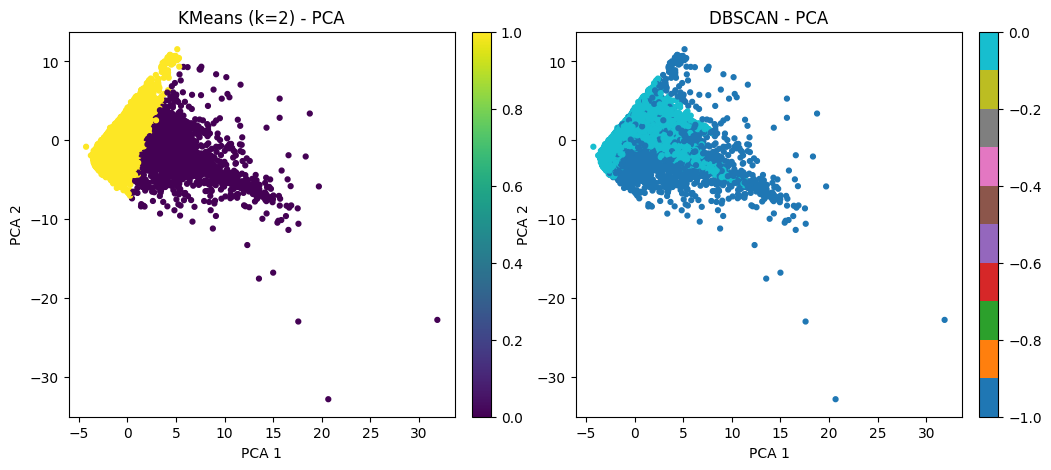

In [12]:
# ====== 6. VISUALISASI PCA ======
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1,2, figsize=(12,5))
s1 = ax[0].scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=12)
ax[0].set_title(f"KMeans (k={best_k}) - PCA")
ax[0].set_xlabel("PCA 1"); ax[0].set_ylabel("PCA 2")
plt.colorbar(s1, ax=ax[0], fraction=0.046, pad=0.04)

s2 = ax[1].scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='tab10', s=12)
ax[1].set_title("DBSCAN - PCA")
ax[1].set_xlabel("PCA 1"); ax[1].set_ylabel("PCA 2")
plt.colorbar(s2, ax=ax[1], fraction=0.046, pad=0.04)
plt.show()


# 4) Approximate Nearest Neighbor (Annoy)
4.1 Build Index + Query 3–5 titik acak

In [13]:
# ====== 7. ANN (Annoy) ======
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Build index (gunakan array 2D -> loop)
for i in range(X_scaled.shape[0]):
    ann.add_item(i, X_scaled[i])

# Semakin banyak trees → lebih akurat (lebih lambat build). 50–100 umumnya cukup.
ann.build(75)

# Pilih 5 query acak dari data (atau bisa dari cluster tertentu)
n_queries = 5
idx_all = np.arange(X_scaled.shape[0])

# Jika ingin dari cluster KMeans saja (non-noise), tidak wajib:
candidates = idx_all  # atau np.where(labels_dbscan != -1)[0] kalau mau dari core DBSCAN
np.random.shuffle(candidates)
queries = candidates[:n_queries]

print("=== ANN Results (Annoy) ===")
for q in queries:
    # cari 10 tetangga terdekat termasuk dirinya sendiri (n=10 contoh)
    n_neighbors = 10
    neighbors = ann.get_nns_by_item(q, n_neighbors, include_distances=True)
    nbr_idx, nbr_dist = neighbors[0], neighbors[1]
    print(f"\nQuery Point Index: {q}")
    for n, d in zip(nbr_idx, nbr_dist):
        print(f"Neighbor Index: {n:5d} | Distance: {d:8.4f} | "
              f"KMeans Cluster: {labels_kmeans[n]:3d} | DBSCAN Label: {labels_dbscan[n]:3d}")


=== ANN Results (Annoy) ===

Query Point Index: 2308
Neighbor Index:  2308 | Distance:   0.0000 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  1304 | Distance:   0.2137 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  2874 | Distance:   0.2641 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  3806 | Distance:   0.2671 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  1459 | Distance:   0.3221 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  3842 | Distance:   0.3509 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  3926 | Distance:   0.3544 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  3008 | Distance:   0.3761 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  3510 | Distance:   0.3953 | KMeans Cluster:   1 | DBSCAN Label:   0
Neighbor Index:  1754 | Distance:   0.4005 | KMeans Cluster:   1 | DBSCAN Label:   0

Query Point Index: 22404
Neighbor Index: 22404 | Distance:   0.0000 | KMeans Cluster:   0 | DBSC

# 6) Kesimpulan Singkat

#a. Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik di antara keduanya dan jelaskan alasannya
KMeans dengan jumlah cluster optimal k=2 menghasilkan dua kelompok yang terpisah cukup jelas, sedangkan DBSCAN hanya membentuk satu cluster besar tanpa banyak variasi. Walaupun DBSCAN memiliki nilai Silhouette sedikit lebih tinggi, pemisahan cluster KMeans secara visual dan nilai Davies–Bouldin yang lebih rendah menunjukkan bahwa KMeans lebih baik dalam mengelompokkan pola perilaku pelanggan pada dataset kartu kredit ini.

#b. Nilai metrik terbaik (Silhouette, DBI)

KMeans (k=2) → Silhouette = 0.3224, Davies–Bouldin = 1.6285

DBSCAN (eps≈2.727) → Silhouette = 0.3660, Davies–Bouldin = 3.2545
Meskipun Silhouette DBSCAN sedikit lebih tinggi, nilai DBI yang lebih kecil pada KMeans menandakan cluster yang lebih kompak dan terpisah lebih baik, sehingga secara keseluruhan KMeans memberikan hasil clustering yang lebih stabil.

#c. Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang sama? Jelaskan jawaban anda

Ya, hampir semua tetangga terdekat yang ditemukan oleh Annoy memiliki label cluster yang sama dengan titik query, baik pada KMeans maupun DBSCAN. Hal ini menunjukkan bahwa titik-titik dengan jarak kemiripan kecil berada dalam kelompok yang sama, sehingga struktur lokal data konsisten dan mendukung hasil clustering yang telah terbentuk.